# Planar flows

This notebook is very much a work in progress, but is aimed to be an introduction to normalising flows, here exemplified by the planar flow. This is often one of the first normalising flows that newcomers to the field are introduced to, as the planar flow is described in the (by now) classic paper [*Normalizing Flows for Variational Inference*](https://arxiv.org/pdf/1505.05770.pdf) by D. Rezende and S. Mohamed.

The planar flow also serves well for building intuition about normalising flows, as it is very suitable for visualising how a normalising flow transforms the base density by repeatedly applying simple transformations of the (in this case) two-dimensional space. 

In [1]:
# General imports.
import torch
import torch.nn
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
# Planar flow imports. 
from planar_flow import PlanarFlow
from target_distribution import TargetDistribution
from loss import VariationalLoss
from utils.gif import make_gif_from_train_plots
from utils.plot import plot_training, plot_density, plot_available_distributions, plot_comparison

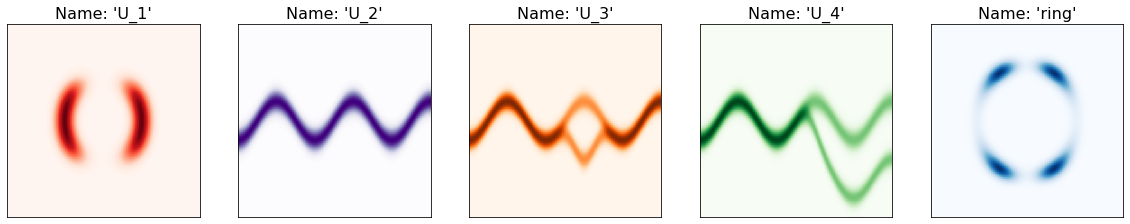

In [2]:
# Plot available distributions.
plot_available_distributions()

In [3]:
# Parameters.
target_distr = "U_1"  # The distribution we want to learn. Choices: ["U_1", "U_2", "U_3", "U_4", "ring"].
flow_length = 32  # Number of transformations in the flow. 
num_batches = 5000  # How many training batches to train for. These are generated on the fly. 
batch_size = 128  # This is... wait for it... the size of each batch. 
lr = 6e-4  # The learning rate for the optimiser.
axlim = 7  # Setting for plotting. Recommended: 5 for 'U_1' to 'U_4', 7 for 'ring'.

In [4]:
# Initialise model, loss, and optimiser. 
model = PlanarFlow(dim=2, K=flow_length)
density = TargetDistribution(target_distr)
bound = VariationalLoss(density)
optimiser = torch.optim.Adam(model.parameters(), lr=lr)

In [5]:
# Train model. 
for batch_num in range(1, num_batches + 1):
    # Get batch from N(0,I).
    batch = torch.zeros(size=(batch_size, 2)).normal_(mean=0, std=1)
    # Pass batch through flow.
    zk, log_jacobians = model(batch)
    # Compute loss under target distribution.
    loss = bound(batch, zk, log_jacobians)
    
    # Train. 
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if batch_num % 1000 == 0:
        print(f"(batch_num {batch_num:05d}/{num_batches}) loss: {loss}")

    if batch_num == 1 or batch_num % 100 == 0:
        # Save plots during training. Plots are saved to the 'train_plots' folder.
        plot_training(model, flow_length, batch_num, lr, axlim)

(batch_num 01000/5000) loss: 0.2673177421092987
(batch_num 02000/5000) loss: -1.460695743560791
(batch_num 03000/5000) loss: -1.7662023305892944
(batch_num 04000/5000) loss: -1.803881287574768
(batch_num 05000/5000) loss: -1.8396358489990234


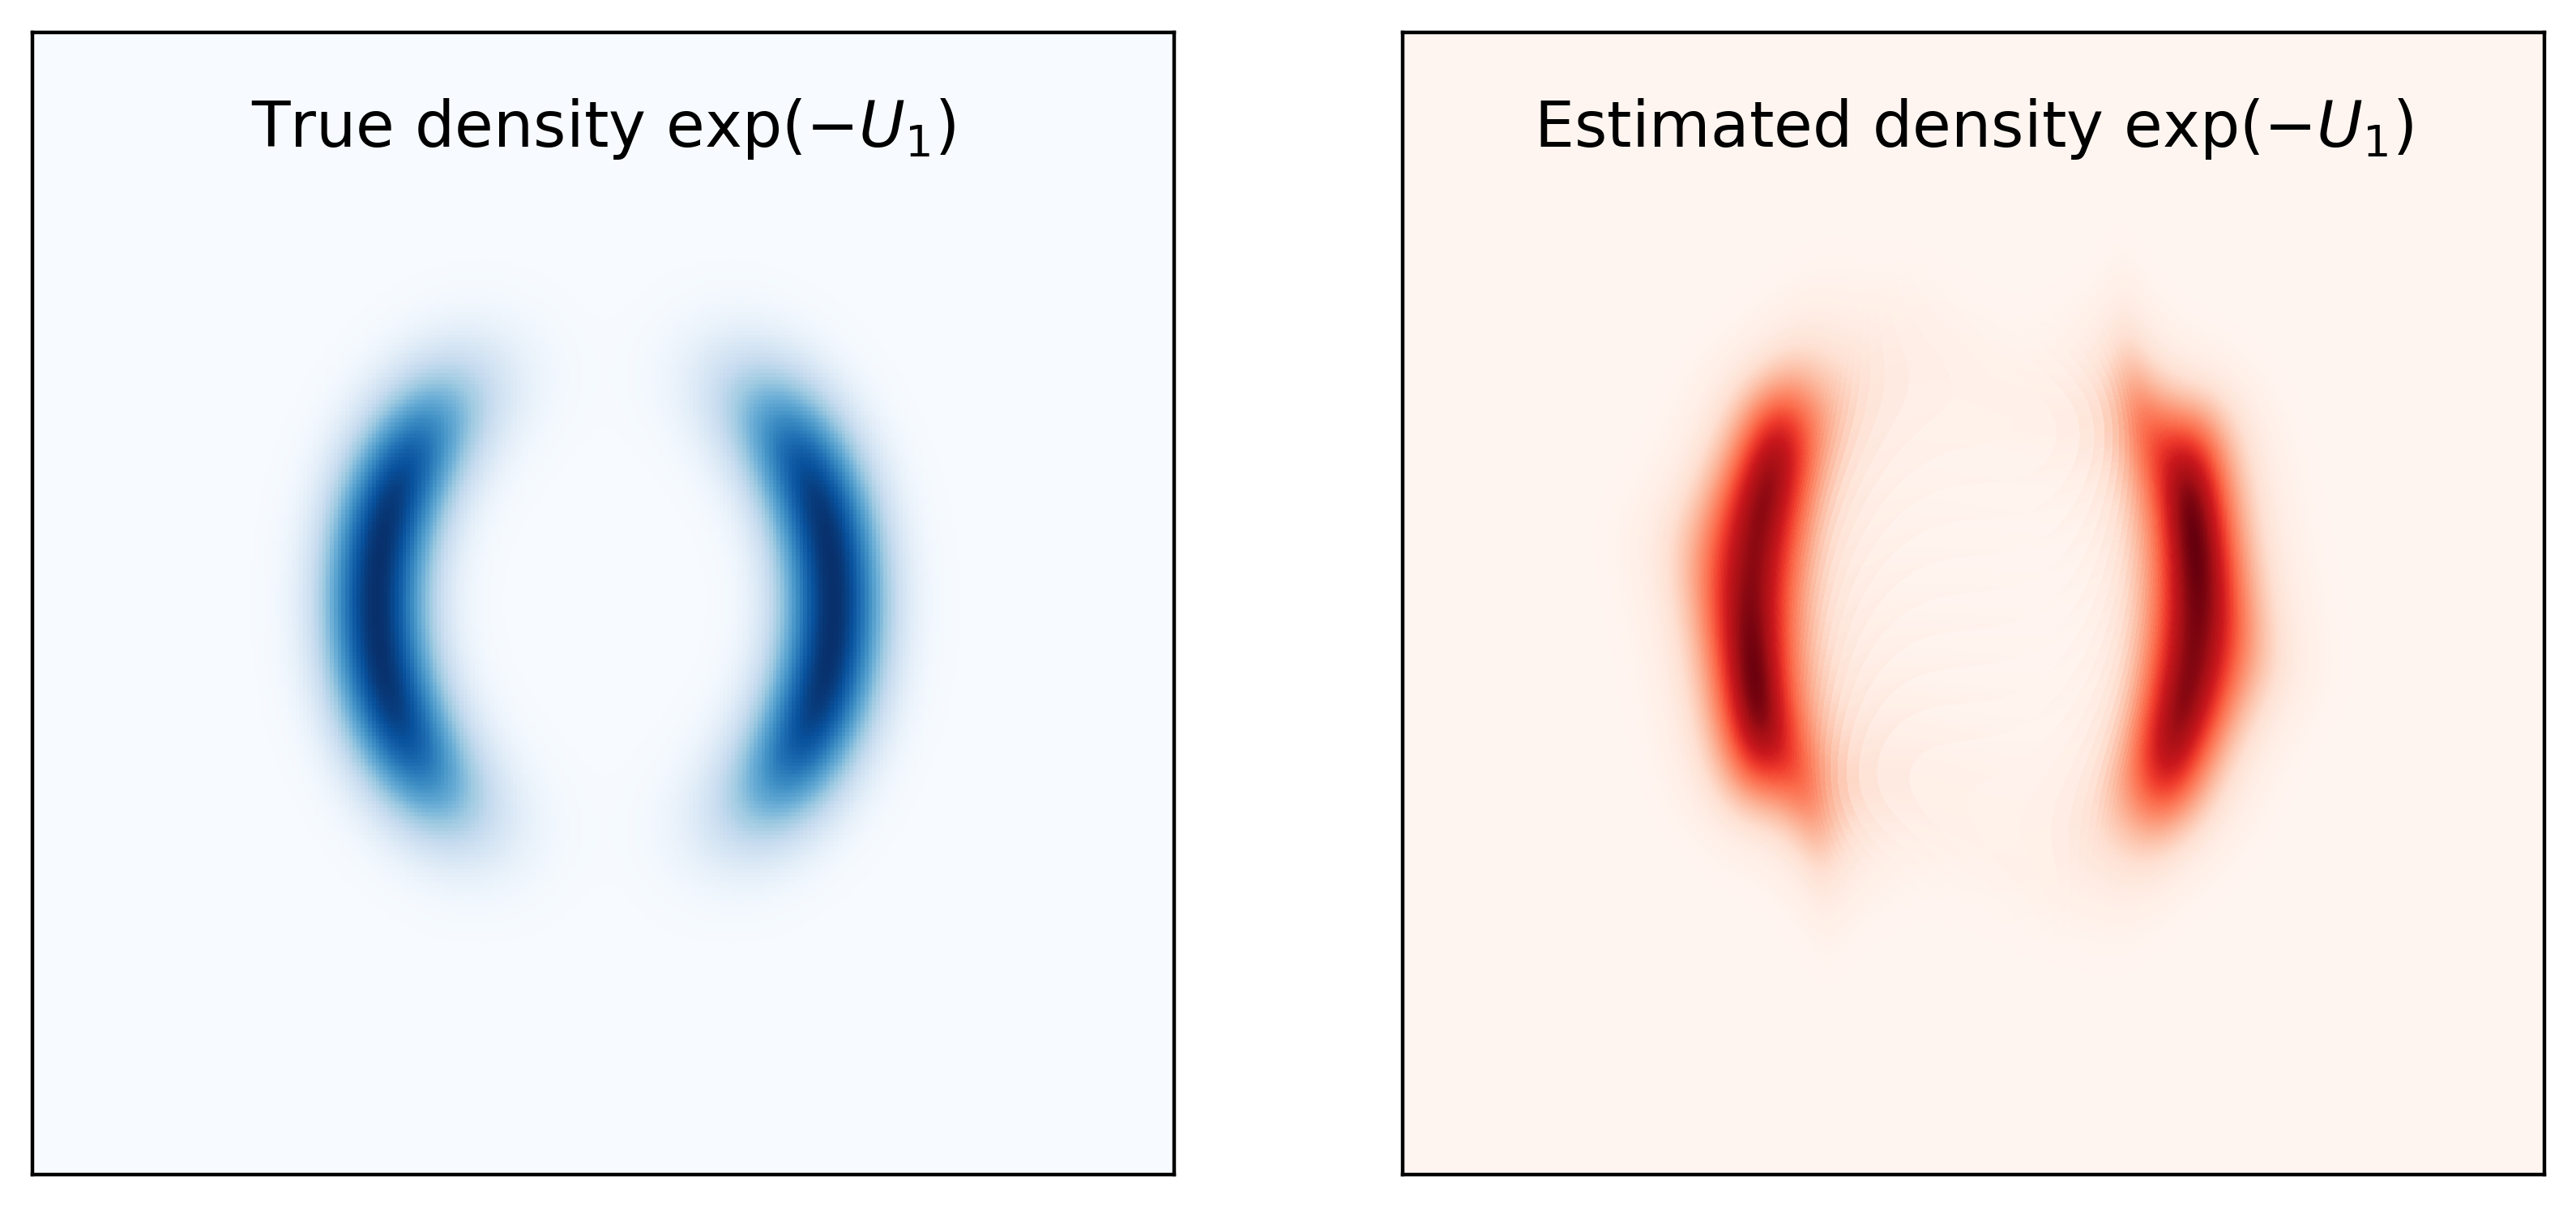

In [6]:
# Plot true and estimated denisty side by side. 
plot_comparison(model, target_distr, flow_length)

In [7]:
# Generate and display an animation of the training progress.
make_gif_from_train_plots('notebook.gif')
display(Markdown('<img src="gifs/notebook.gif" width="400">')) # Ugly 🤮

<img src="gifs/notebook.gif" width="400">